### `Task`
Use the famous boston dataset and find out if there is multicollinearity or not. If there is multicollinearity try to remove it with help of steps taught in the session.

Data Link : https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [ ]:
# Solution

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

```
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
```

In [ ]:
import pandas as pd
import numpy as np


# Load the Boston housing dataset
boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


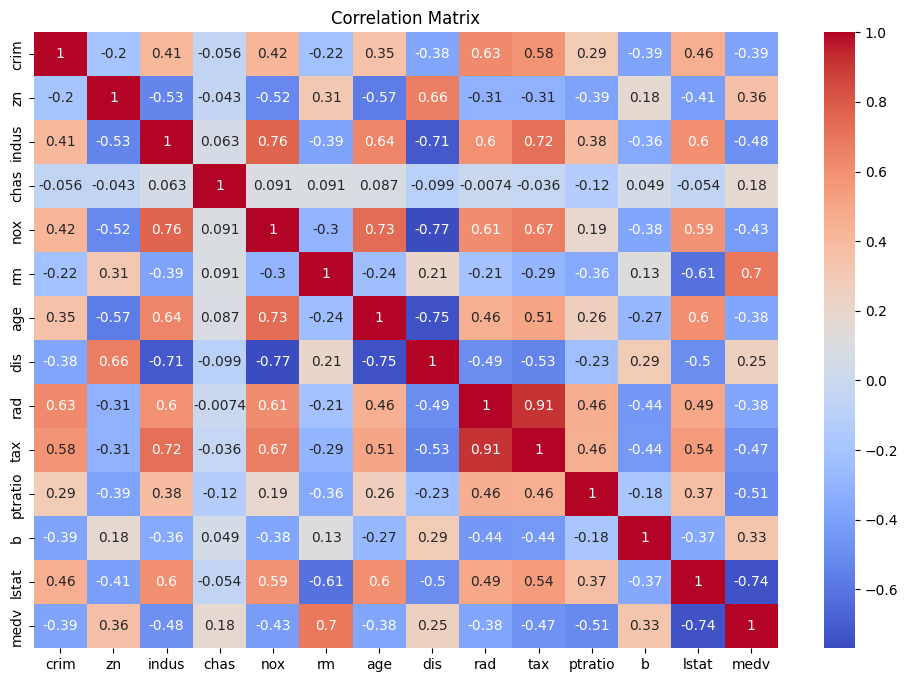

In [ ]:
## Approach - 1 : Correlation
# Calculate the correlation matrix
correlation_matrix = boston.corr()


# Ploting corr

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Based on the correlation matrix, identify highly correlated features. A commonly used threshold is a correlation coefficient greater than or equal 0.8 or less than or equal -0.8.

* Remove highly correlated features.

In [ ]:
# Example: Removing highly correlated features based on a threshold of 0.7
threshold = 0.8

# Identify the highly correlated feature pairs
high_corr_features = np.where(np.abs(correlation_matrix.values[:-1,:-1]) >= threshold)

# Create a set to store the features to remove
features_to_remove = set()

# Iterate through the pairs and remove one of the correlated features
for i, j in zip(*high_corr_features):
    if i != j and i not in features_to_remove and j not in features_to_remove:
        # Remove that feature whis has low correlation with target column
        features_to_remove.add(j if np.abs(correlation_matrix['medv']).iloc[i] > np.abs(correlation_matrix['medv']).iloc[j] else i)

# Remove the features from the dataset
df_filtered_corr = boston.drop(boston.columns[list(features_to_remove)], axis=1)

In [ ]:
df_filtered_corr

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0


#### VIF Approach

To remove multicollinear columns using the Variance Inflation Factor (VIF)

* 1. **Calculate the VIF for each feature.**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Extract the independent variables (features) and target variable
X = boston.drop('medv', axis=1)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Feature,VIF
0,crim,2.100373
1,zn,2.844013
2,indus,14.485758
3,chas,1.152952
4,nox,73.894947
5,rm,77.948283
6,age,21.386850
7,dis,14.699652
8,rad,15.167725
9,tax,61.227274


* 2. **Analyze the VIF values.**

    Inspect the VIF values for each feature. Higher VIF values indicate a stronger multicollinearity. A commonly used threshold to detect multicollinearity is a VIF value greater than 5 or 10.

In [ ]:
# Set the threshold for VIF
vif_threshold = 5

# Identify features with high VIF values
high_vif_features = vif[vif['VIF'] > vif_threshold]['Feature'].values

# Remove features with high VIF values from the dataset
df_filtered_vif = boston.drop(high_vif_features, axis=1)

df_filtered_vif

,crim,zn,chas,medv
0,0.00632,18.0,0,24.0
1,0.02731,0.0,0,21.6
2,0.02729,0.0,0,34.7
3,0.03237,0.0,0,33.4
4,0.06905,0.0,0,36.2
...,...,...,...,...
501,0.06263,0.0,0,22.4
502,0.04527,0.0,0,20.6
503,0.06076,0.0,0,23.9
504,0.10959,0.0,0,22.0


#### Condition Number Approach

* **Calculate the condition number.**



In [ ]:
# Extract the independent variables (features) and target variable
X = boston.drop('medv', axis=1)

# Calculate the condition number
condition_number = np.linalg.cond(X)
condition_number

8497.936303845774

* Remove features with high condition number (if necessary). (>30)

In [ ]:
def remove_features_condition_number(X, threshold):
    condition_number = np.linalg.cond(X)
    if condition_number < threshold:
        return X

    n_features = X.shape[1]
    for i in range(n_features):
        X_temp = X.drop(X.columns[i], axis=1)
        condition_number_temp = np.linalg.cond(X_temp)
        if condition_number_temp < threshold:
            return remove_features_condition_number(X_temp, threshold)

    # If no subset of features satisfies the condition number threshold,
    # return the original features
    return X

# Set the threshold for condition number
condition_number_threshold = 30

# Remove features until the condition number falls below the threshold
df_filtered_condition_number = remove_features_condition_number(X, condition_number_threshold)
df_filtered_condition_number

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
# Calculate the condition number
condition_number = np.linalg.cond(df_filtered_condition_number)
condition_number

8497.936303845774

In [ ]:
import statsmodels.api as sm

# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(boston.drop('medv', axis=1))


# Create and fit an OLS model using all three predictor variables
model_all = sm.OLS(boston['medv'], data_with_constant_all).fit()

# Print the summary for the model with all predictors
print("Regression summary for the model with all predictors:")
print(model_all.summary())



Regression summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 15 May 2023   Prob (F-statistic):          6.72e-135
Time:                        10:21:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Data after filtering from corr approach -> corr approach drop tax column

data_with_corr_reduced = sm.add_constant(df_filtered_corr.drop('medv', axis=1))

# Create and fit an OLS model using only X1 and X3 (removing the highly correlated variable X2)
model_reduced = sm.OLS(boston['medv'], data_with_corr_reduced).fit()

# Print the summary for the model with reduced predictors (X1 and X3)
print("\nRegression summary for the model with reduced predictors (X1 and X3):")
print(model_reduced.summary())


Regression summary for the model with reduced predictors (X1 and X3):
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.8
Date:                Mon, 15 May 2023   Prob (F-statistic):          1.92e-131
Time:                        10:21:34   Log-Likelihood:                -1509.5
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [ ]:
# Data after filtering from corr approach

data_with_vif_reduced = sm.add_constant(df_filtered_vif)

# Create and fit an OLS model using only X1 and X3 (removing the highly correlated variable X2)
model_reduced = sm.OLS(boston['medv'], data_with_vif_reduced).fit()

# Print the summary for the model with reduced predictors (X1 and X3)
print("\nRegression summary for the model with reduced predictors (X1 and X3):")
print(model_reduced.summary())


Regression summary for the model with reduced predictors (X1 and X3):
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.332e+31
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        10:22:40   Log-Likelihood:                 15301.
No. Observations:                 506   AIC:                        -3.059e+04
Df Residuals:                     501   BIC:                        -3.057e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------